In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from numpy import *
import sys

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
sess = tf.InteractiveSession()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
new_saver = tf.train.import_meta_graph('./saved_mnist_cnn.ckpt.meta')
new_saver.restore(sess, 'saved_mnist_cnn.ckpt')

INFO:tensorflow:Restoring parameters from saved_mnist_cnn.ckpt


In [4]:
x = sess.graph.get_tensor_by_name("input:0")
y_conv = sess.graph.get_tensor_by_name("output:0")
keep_prob = sess.graph.get_tensor_by_name("keep_prob:0")

### 이미지 파일 읽어오기

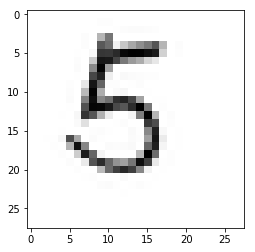

In [23]:
im=Image.open("./Number_data/number_6.jpeg")
img = array(im.resize((28, 28), Image.ANTIALIAS).convert("L"))
data = img.reshape([1, 784])
plt.imshow(img.reshape(28, 28), cmap='gray', interpolation='nearest')

# plt.imshow(img.reshape(28,28), cmap='Greys', interpolation= 'nearest')

In [24]:
# tf.initialize_all_variables().run()
result = sess.run(y_conv, feed_dict={x:data, keep_prob:1})
print(result)
print(sess.run(tf.argmax(result, 1)))

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.16139616e-17   0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00]]
[8]


### MNIST 데이터에서 읽어오기

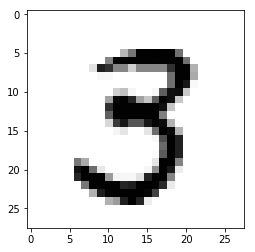

In [25]:
image_b = mnist.validation.images[1675]
plt.imshow(image_b.reshape([28, 28]), cmap='Greys')

In [26]:
image_b = image_b.reshape([1, 784])
result = sess.run(y_conv, feed_dict={x:image_b, keep_prob:1})
print(result)
print(sess.run(tf.argmax(result, 1)))

[[  1.89082318e-15   3.56924803e-13   1.29197122e-13   9.99999762e-01
    2.19099928e-17   2.80652813e-07   2.49292236e-15   8.40474446e-13
    4.28671626e-10   2.19379195e-10]]
[3]


### HTML 숫자 그리기

In [9]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

In [13]:
javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;


    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [14]:
from IPython.display import HTML
HTML(input_form + javascript)

In [17]:
result = sess.run(y_conv, feed_dict={x:[image], keep_prob:1.0})

print(result)
print(sess.run(tf.argmax(result, 1)))


[[  1.80072141e-06   1.16273235e-07   1.03667953e-05   1.16682022e-05
    6.31366204e-09   4.26514771e-06   4.41502976e-07   6.97813789e-07
    9.99962211e-01   8.49368098e-06]]
[8]


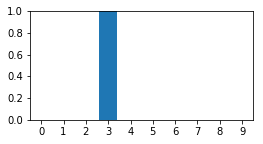

In [16]:
p_val = sess.run(y_conv, feed_dict={x:[image], keep_prob:1.0})

fig = plt.figure(figsize=(4,2))
pred = p_val[0]
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks(range(10))
subplot.set_xlim(-0.5,9.5)
subplot.set_ylim(0,1)
subplot.bar(range(10), pred, align='center')
plt.show()